In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/BTC-USD.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


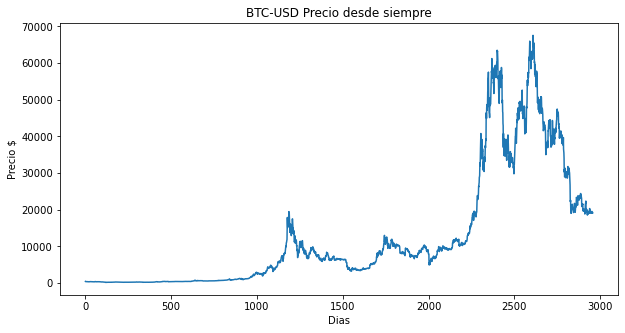

In [4]:
plt.figure(figsize= (10,5))
plt.plot(data['Close'], label = "BTC-USD Close")
plt.title('BTC-USD Precio desde siempre')
plt.xlabel('Dias')
plt.ylabel('Precio $')
#plt.legend('BTC-USD', loc = 'upper right')
plt.show()

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
#Definir el periodo
p=14
p_str=str(p)

In [7]:
def ExpMovAverage(dt, period):
    exp_result=dt.ewm(span=period, adjust=False).mean()
    return exp_result

In [8]:
p=14
dm_df=pd.DataFrame()
tr_df=pd.DataFrame()

dm_df['Date']=data['Date']
tr_df['Date']=data['Date']
   

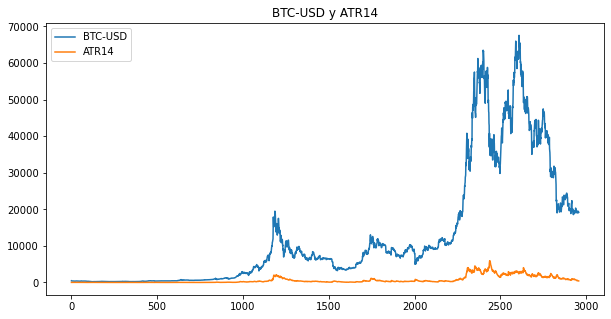

In [9]:
#TR

metodo_1 = []
metodo_2 = []
metodo_3 = []
tr = []


def TR(dt):
    for i in range(len(dt)):
        #Calcular
        uno = np.abs(dt['High'][i] - dt['Low'][i])
        #Añadir
        metodo_1.append(uno)
        if(i-1!=-1):
            #Calcular
            dos = np.abs(dt['High'][i] - dt['Close'][i-1])
            tres = np.abs(dt['Low'][i] - dt['Close'][i-1])

            #Añadir
            metodo_2.append(dos)
            metodo_3.append(tres)

            #Comparar
            tr.append(np.amax([uno,dos,tres]))
            
        else: #El primer valor
            metodo_2.append(np.nan)
            metodo_3.append(np.nan)
            tr.append(uno)
        
            
    return(metodo_1,metodo_2,metodo_3, tr)


tr_df = pd.DataFrame()

resultados_tr = TR(data)

tr_df['Date'] = data['Date']
tr_df['Uno'] = pd.Series(resultados_tr[0])
tr_df['Dos'] = pd.Series(resultados_tr[1])
tr_df['Tres'] = pd.Series(resultados_tr[2])
tr_df['Tr_final'] = pd.Series(resultados_tr[3])


#ATR14

#Calcular el 1º
# ATR1 = tr_df['Tr_final'].iloc[0:p].rolling(window=p).mean()
# tr_df['ATR'+p_str] = pd.Series(ATR1)

#Calcular los siguientes
# for i in range(len(tr_df['Tr_final'])-p):
#     o = (i+p)
#     tr_df['ATR'+p_str].iloc[o] = (tr_df['ATR'+p_str].iloc[o-1] * (p-1) + tr_df['Tr_final'].iloc[o])/p
#                                 (tr_df['ATR'+p_str].iloc[o-1] * (p-1) + tr_df['Tr_final'].iloc[o])/p
#         tr_df['ATR'+p_str].iloc[p-1] - (tr_df['Tr_final'].iloc[o-1]/p) + tr_df['Tr_final'].iloc[o]
        
#         dm_df[signo+'DM'+p_str].iloc[o] = DM14_1.iloc[p-1] - ant_entre_p + dm_df[signo+'DM'].iloc[o]
#         dm_df[signo+'DM'+p_str].iloc[o] = (dm_df[signo+'DM'+p_str].iloc[o-1] * (p-1) + dm_df[signo+'DM'].iloc[o])/p


tr_df['ATR'+p_str] = ExpMovAverage(tr_df['Tr_final'], p)

#ATR14 Y Precio

plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='BTC-USD')

plt.plot(tr_df['ATR'+p_str], label='ATR'+p_str)
plt.title('BTC-USD y ATR14')
plt.legend(loc='upper left')
plt.show()

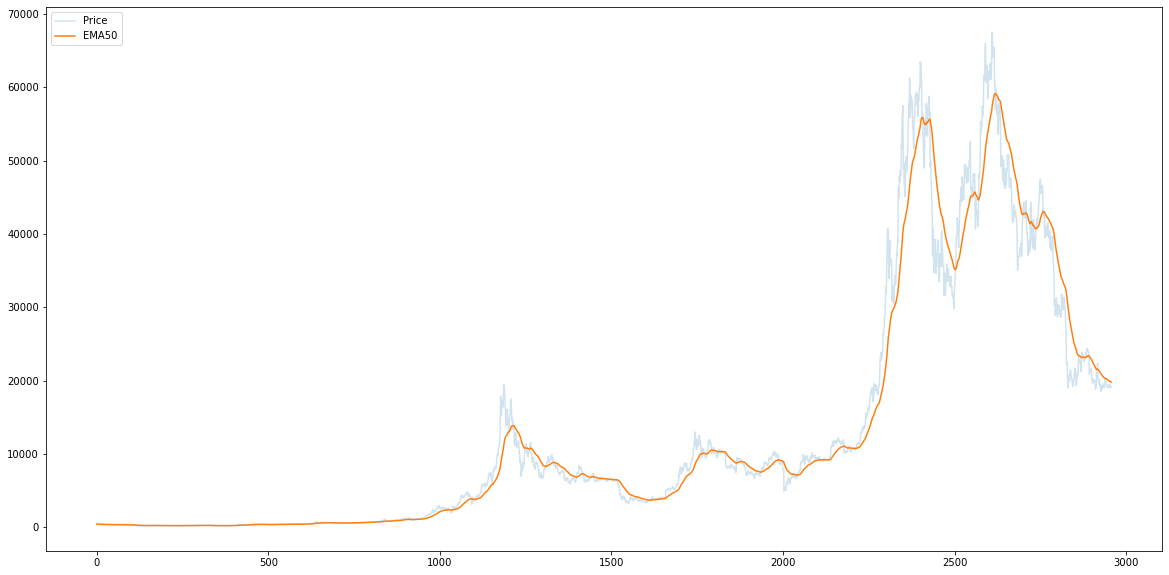

In [22]:
ema_df=pd.DataFrame()

def EMA(dt,days):
    
    days_str = str(days)
    ema_df['Date']=dt['Date']
    
#     k = 2/(days+1)
    
#     sma1 = dt['Close'].iloc[:days].rolling(window=days).mean()
#     ema_df['EMA'+days_str]=pd.Series(sma1)
#     for i in range(len(data)-days):
#         o=i+days
        
#         price_mult = data['Close'].iloc[o] * k 
#         ema_ant_mult = ema_df['EMA'+days_str].iloc[o-1] * (1-k)

#         ema_df['EMA'+days_str].iloc[o] = price_mult + ema_ant_mult

    ema_df['EMA'+days_str] = ExpMovAverage(dt['Close'], days) 
        
    plt.figure(figsize=(20,10))
    
    plt.plot(data['Close'], label='Price', alpha=0.2)
    plt.plot(ema_df['EMA'+days_str], label='EMA'+days_str)
#     plt.plot(ema_df['EMA'+days_str], label='EMA'+days_str)

    plt.legend(loc='upper left')
    plt.show()
    
EMA(data,50)

In [11]:
#Calcular +DM -DM

mas_dm=[]
menos_dm=[]

def CalcDMs(dt):
    for i in range(len(dt)):
        if(i>0):
            A = dt['High'][i] - dt['High'][i-1]
            B = dt['Low'][i-1] - dt['Low'][i]
            if(0<A>B):
                mas_dm.append(A)
                menos_dm.append(0)
            elif(0<B>A):
                menos_dm.append(B)
                mas_dm.append(0)
            else:
                mas_dm.append(0)
                menos_dm.append(0)
        else:
            mas_dm.append(0)
            menos_dm.append(0)
    return(mas_dm, menos_dm)

In [12]:
resultados_dm = CalcDMs(data)

dm_df = pd.DataFrame()
dm_df['Date']=data['Date']
dm_df['+DM']=pd.Series(resultados_dm[0])
dm_df['-DM']=pd.Series(resultados_dm[1])

# display = None
# pd.set_option('display.max_columns', display)
# pd.set_option('display.max_rows', display)

# dm_df

In [13]:
#DM14
# def DM14(signo):
#     #First
#     DM14_1=dm_df[signo+'DM'].iloc[0:p].rolling(window=p).mean()
#     dm_df[signo+'DM'+p_str] = pd.Series(DM14_1)
#     #Nexts
#     for i in range(len(dm_df[signo+'DM'])-p):
#         o=i+p
#         ant_entre_p = dm_df[signo+'DM'+p_str].iloc[o-1]/p
# #         dm_df[signo+'DM'+p_str].iloc[o] = DM14_1.iloc[p-1] - ant_entre_p + dm_df[signo+'DM'].iloc[o] MALA EXPONENCIAL
#         dm_df[signo+'DM'+p_str].iloc[o] = (dm_df[signo+'DM'+p_str].iloc[o-1] * (p-1) + dm_df[signo+'DM'].iloc[o])/p #BUENA


# #Execute for both
# DM14('+')
# DM14('-')

In [14]:
#DM14
def DM14(signo):
    dm_df[signo+'DM'+p_str] = ExpMovAverage(dm_df[signo+'DM'], p)


# #Execute for both
DM14('+')
DM14('-')

In [15]:
# DI14
# Positive DI (+DI14) = +DM14 / TR14
# Negative DI (-DI14) = -DM14 / TR14
def DI14(signo):
    dm_df[signo+'DI'+p_str] = 100 * (dm_df[signo+'DM'+p_str])/tr_df['ATR'+p_str]
    #+di = +dm14*100/atr14
    
DI14('+')
DI14('-')

In [16]:
def Calc_DX(mas_di, menos_di):
    
    numerador = np.abs(mas_di - menos_di)
    denominador = mas_di + menos_di
    DX = numerador*100/denominador
    dm_df['DX'] = pd.Series(DX)
    
Calc_DX(dm_df['+DI'+p_str],dm_df['-DI'+p_str])

In [17]:
def Calc_ADX(dt):
#     ADX_1 = dm_df['DX'].rolling(window=p).mean()
#     dt['ADX'+p_str] = pd.Series(ADX_1)
#     for i in range(len(dt)-(p*2)-1):
#         o=i+(p*2)-1
#         ant_trece = dt['ADX'+p_str].iloc[o-1] * (p-1)
#         dt['ADX'+p_str].iloc[o] = (ant_trece + dt['DX'].iloc[o]) / p

    dm_df['ADX'+p_str] = dt['DX'].rolling(window=p).mean()
                        #100 * ExpMovAverage(dm_df['DX'], p)
                
Calc_ADX(dm_df)

In [18]:
# display = None
# pd.set_option('display.max_columns', display)
# pd.set_option('display.max_rows', display)
# dm_df

Resutados:


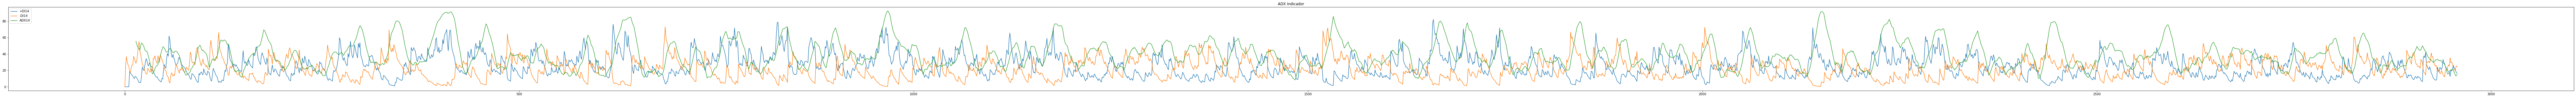

In [23]:
#Results:
print('Resutados:')

#Features
# plt.figure(figsize=(10,2))

#Price
# plt.plot(data['Close'], label='BTC-USD')
# plt.show()

#DMIs
#Features
plt.figure(figsize=(150,5))


# plt.plot(dm_df['+DM']*exag_di, label='+DM')
# plt.plot(dm_df['-DM']*exag_di, label='-DM')

# plt.plot(dm_df['+DM'+p_str], label='+DM'+p_str)
# plt.plot(dm_df['-DM'+p_str], label='-DM'+p_str)

plt.plot(dm_df['+DI'+p_str], label='+DI'+p_str)
plt.plot(dm_df['-DI'+p_str], label='-DI'+p_str)

plt.plot(dm_df['ADX'+p_str], label='ADX'+p_str)

#Features
plt.title('ADX Indicador')
plt.legend(loc='upper left')
plt.show()